Number punctuation marks in doyle = 6704
Number punctuation marks in wells = 7721
Number punctuation marks in unknown = 10035


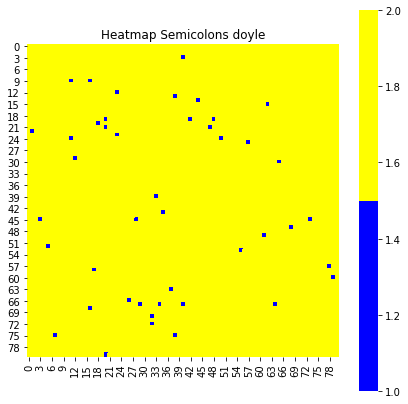

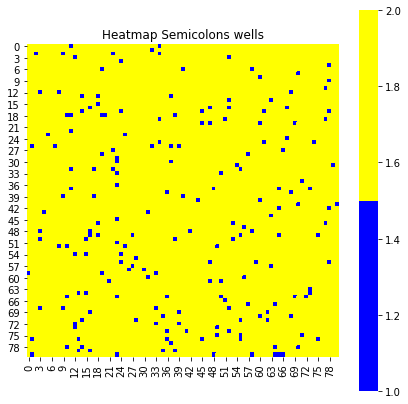

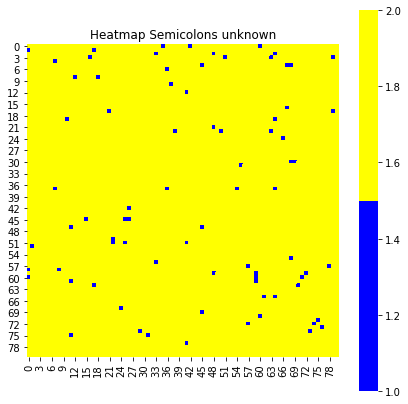

In [3]:
"""製作標點符號熱圖"""
import math
from string import punctuation
import nltk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# 安裝 seaborn 請在命令執行檔輸入: pip install seaborn.

PUNCT_SET = set(punctuation)

def main():  
    # 載入文字檔到作者的字典
    strings_by_author = dict()
    strings_by_author['doyle'] = text_to_string('hound.txt')
    strings_by_author['wells'] = text_to_string('war.txt')
    strings_by_author['unknown'] = text_to_string('lost.txt')

    # 進行斷詞，並僅保留標點符號
    punct_by_author = make_punct_dict(strings_by_author)

    # 轉換標點符號為數值，畫出熱圖
    plt.ion()
    for author in punct_by_author:
        heat = convert_punct_to_number(punct_by_author, author)
        arr = np.array((heat[:6561]))
        arr_reshaped = arr.reshape(int(math.sqrt(len(arr))),
                                   int(math.sqrt(len(arr))))
        fig, ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(arr_reshaped,
                    cmap=ListedColormap(['blue', 'yellow']),
                    square=True,
                    ax=ax)
        ax.set_title('Heatmap Semicolons {}'.format(author))
    plt.show() # Windows PowerShell的使用者需使用 plt.show(block=True) 防止圖案關閉

def text_to_string(filename):
    """讀取文字檔並以字串形式傳回"""
    with open(filename, encoding='utf-8', errors='ignore') as infile:
        return infile.read()

def make_punct_dict(strings_by_author):
    """傳回將作品斷詞後的標點符號字典"""
    punct_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        punct_by_author[author] = ([token for token in tokens
                                    if token in PUNCT_SET])
        print("Number punctuation marks in {} = {}"
              .format(author, len(punct_by_author[author])))
    return punct_by_author  

def convert_punct_to_number(punct_by_author, author):
    """傳回已轉換為數值的標點符號 list"""
    heat_vals = []
    for char in punct_by_author[author]:
        if char == ';':
            value = 1
        else:
            value = 2
        heat_vals.append(value)
    return heat_vals

if __name__ == '__main__':
    main()